In [4]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [6]:
villes = pd.read_csv('./villes.csv', sep=';', header=0)

In [7]:
villes.head(3)

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3


In [8]:
villes.shape

(32, 13)

In [11]:
x = villes.iloc[:, 1:13].values
labels = villes.iloc[:, 0].values
print("Ville : ", labels[0], ", Température : ", x[0])

Ville :  ajac , Température :  [ 7.7  8.7 10.5 12.6 15.9 19.8 22.  22.2 20.3 16.3 11.8  8.7]


# ACP

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
SC = StandardScaler()
SC.fit(x)
Xnorm = SC.transform(x)

In [16]:
pca = PCA(n_components=12)
pca.fit(Xnorm)

PCA(n_components=12)

In [18]:
pca.explained_variance_

array([10.80999558,  1.45184229,  0.0581652 ,  0.03279996,  0.01406283,
        0.00621041,  0.00523837,  0.00406512,  0.00187861,  0.00145726,
        0.0010361 ,  0.00034505])

In [19]:
pca.explained_variance_ratio_

array([0.87268193, 0.11720602, 0.00469563, 0.00264791, 0.00113528,
       0.00050136, 0.00042289, 0.00032817, 0.00015166, 0.00011764,
       0.00008364, 0.00002786])

In [20]:
pca.components_[0, :]

array([0.27151028, 0.28846164, 0.3010811 , 0.30354174, 0.28353089,
       0.27841907, 0.27290295, 0.28757774, 0.30472022, 0.3038548 ,
       0.29242808, 0.2729549 ])

In [22]:
pca.components_[1, :]

array([ 0.39933494,  0.29907184,  0.12943051, -0.11530598, -0.32314291,
       -0.35846763, -0.38879639, -0.3010133 , -0.11231622,  0.12249226,
        0.26269461,  0.38693688])

In [23]:
X_pca=pca.transform(Xnorm)

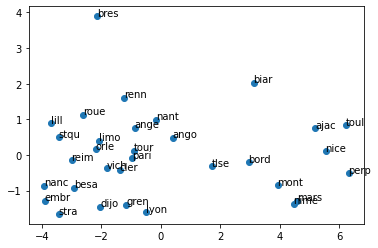

In [24]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 
plt.show()

# CRIME

In [6]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings('ignore')

In [7]:
crimes = pd.read_csv('./crimes.csv', sep=';', header=0)

In [8]:
crimes.head(3)

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5


In [16]:
x = crimes.iloc[:, 1:8].values
labels = crimes.iloc[:, 0].values
print("Etat : ", labels[0], ", Crimes : ", x[0])

Etat :  Alabama , Crimes :  [  14.2   25.2   96.8  278.3 1135.5 1881.9  280.7]


In [17]:
# ACP Crimes

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [13]:
SC = StandardScaler()
SC.fit(x)
Xnorm = SC.transform(x)

In [18]:
pca = PCA(n_components=7)
pca.fit(Xnorm)

PCA(n_components=7)

In [19]:
pca.explained_variance_

array([4.19893828, 1.26400187, 0.74062921, 0.32288984, 0.26323924,
       0.22657089, 0.12658781])

In [20]:
pca.explained_variance_ratio_

array([0.58785136, 0.17696026, 0.10368809, 0.04520458, 0.03685349,
       0.03171992, 0.01772229])

In [21]:
pca.components_[0,:]

array([0.30027916, 0.43175936, 0.39687549, 0.3966517 , 0.44015721,
       0.35735953, 0.29517681])

In [ ]:
-_____________y1________________+ meurtre, rapt, ... auto_theft

In [23]:
1/np.sqrt(7)

0.3779644730092272

In [31]:
pca.components_[1,:]

array([-0.62917444, -0.16943512,  0.04224698, -0.34352815,  0.20334059,
        0.40231912,  0.50242093])

In [ ]:
meurte, attaque - _______________y2________________ + larcin, auto_theft

In [32]:
X_pca=pca.transform(Xnorm)

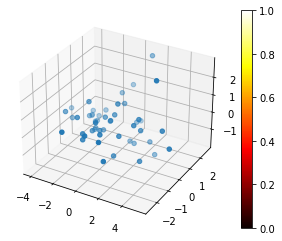

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], X_pca[:, 3], cmap=plt.hot())
fig.colorbar(img)
plt.show()

In [48]:
# Ici l'interprétation avec 4 axes est peu voir pas du tout compréhensible. C'est pourquoi, on choisit d'utiliser
# les 2 axes ayant des valeurs supérieurs à 1 dans pca.explained_variance. Dans notre cas, nous allons perdre une partie de
# l'information du dataset de base (environ 25%).

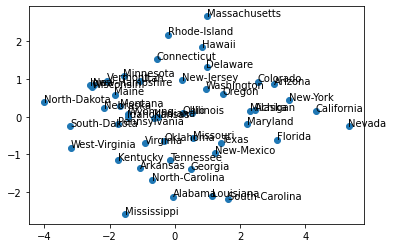

In [49]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 
plt.show()

In [ ]:
# Interprétation : 

# Stratups

In [50]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings('ignore')

In [51]:
startups = pd.read_csv('./50_Startups.csv', sep=';', header=0)

In [52]:
startups.head(3)

,Id,Depenses R&D,Depenses Administration,Depenses Marketing Spend,Benefice
0,1,165349.20,136897.80,471784.10,192261.83
1,2,162597.70,151377.59,443898.53,191792.06
2,3,153441.51,101145.55,407934.54,191050.39


In [54]:
x = startups.iloc[:, 1:5].values
labels = startups.iloc[:, 0].values
print("Startups : ", labels[0], ", Chiffres: ", x[0])

Startups :  1 , Chiffres:  [165349.2  136897.8  471784.1  192261.83]


In [55]:
# ACP Startups

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [57]:
SC = StandardScaler()
SC.fit(x)
Xnorm = SC.transform(x)

In [58]:
pca = PCA(n_components=4)
pca.fit(Xnorm)

PCA(n_components=4)

In [59]:
pca.explained_variance_

array([2.7267099 , 1.04019163, 0.28830861, 0.02642251])

In [60]:
pca.explained_variance_ratio_

array([0.66804393, 0.25484695, 0.07063561, 0.00647351])

In [61]:
pca.components_[0,:]

array([0.59347855, 0.14737886, 0.52064694, 0.59580992])

In [62]:
pca.components_[1,:]

array([-0.04048087, -0.95051314,  0.30797098,  0.00632069])

In [63]:
X_pca=pca.transform(Xnorm)